In [3]:
%pip install qiskit

Processing c:\users\avyuk\appdata\local\pip\cache\wheels\86\ba\5c\4e9115777de42c6a2e1ca77ef7c9d0d479254c5080341b55c5\python_constraint-1.4.0-py2.py3-none-any.whl
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11758 sha256=7af3d47338c7434ba9b26705f95714bf91c492a27025e879279bd9814f709631
  Stored in directory: c:\users\avyuk\appdata\local\pip\cache\wheels\9f\f8\19\dacc191256a3d7dc26aec784e0293340351285b7123d23703d
Successfully built qiskit
Note: you may need to restart the kernel to use updated packages.


In [66]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [67]:
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [68]:
backend = Aer.get_backend('statevector_simulator')
cq = QuantumCircuit(2, 2) # 2 qubits and 2 classical registers
# add hadamard to qubits 0 and 1
cq.h([0, 1])
cq.append(oracle, [0, 1])
cq.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [69]:
job = execute(cq, backend)
res = job.result()
state_vector = res.get_statevector()

In [70]:
# reflection operator
# |s><s| - I => reflects vector s over originial s vector
# applying negative phase to every state orthogonal to originial s state
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0, 1])
reflection.z([0, 1])
# controlled z applies X gate to qubit in state 1
reflection.cz(0, 1)
# this circuit applies negative phase only to 00 state
reflection.h([0, 1])
reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [71]:
backend = Aer.get_backend('qasm_simulator')
cq = QuantumCircuit(2, 2)
cq.h([0, 1])
cq.append(oracle, [0, 1])
cq.append(reflection, [0, 1])
cq.measure([0, 1], [0, 1])

In [72]:
cq.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [73]:
job = execute(cq, backend, shots=1)
res = job.result()
res.get_counts()

{'11': 1}

In [74]:
unstruct_db = [23, 40, 3, 30, 239, 29, 200, 18, 340, 18, 204, 80, 460, 2]

In [2]:
# # with euclididan distance
# import time

# starting = 10
# size = starting

# sizes = [size+i for i in range(starting, 1000, 50)]
# # sizes = [3, 4, 5, 6, 7, 8, 9, 10]

# x = []
# y = []
# prev_x = []
# prev_y = []

# for i in range(len(sizes)):
#     graph = Graph(length=sizes[i], width = sizes[i], start_node=(0, 0), end_node=(sizes[i]-1, sizes[i]-1)) # sn -> (j, i) en -> (j, i)

#     # grid = graph.get_grid()

#     # print(grid)

#     graph.wall_generation(generation_state='random', num_walls=5)
# #     print(graph.get_grid())
#     # graph.wall_generation(generation_state='custom', num_walls=5, coords=[[(10, 10), 10, 5]])

#     # grid = graph.get_grid()

#     # print(grid)

#     # path = graph.greedy_heuristic_alg(heuristic_type='euclidian')
#     # print(path)
#     start = time.time()
#     graph.AStar(heuristic_type='euclidian')
#     end = time.time()
    
#     total = end - start
    
#     x.append(sizes[i])
#     y.append(total)
    
# for i in range(len(sizes)):
#     graph = Graph(length=sizes[i], width = sizes[i], start_node=(0, 0), end_node=(sizes[i]-1, sizes[i]-1)) # sn -> (j, i) en -> (j, i)

#     # grid = graph.get_grid()

#     # print(grid)

# #     graph.wall_generation(generation_state='random', num_walls=5)
# #     print(graph.get_grid())
#     # graph.wall_generation(generation_state='custom', num_walls=5, coords=[[(10, 10), 10, 5]])

#     # grid = graph.get_grid()

#     # print(grid)

#     # path = graph.greedy_heuristic_alg(heuristic_type='euclidian')
#     # print(path)
#     start = time.time()
#     graph.AStar(heuristic_type='euclidian')
#     end = time.time()
    
#     total = end - start
    
#     prev_x.append(sizes[i])
#     prev_y.append(total)

In [3]:
plt.plot(x, y)
plt.plot(prev_x, prev_y)
plt.xlabel('Square Grid Length and Width')
plt.ylabel('Time (s)')
plt.legend(["A* Euclidean", "A* Perfect Estimation"])

NameError: name 'plt' is not defined

In [105]:
x_coords = []
y_coords = []

def heuristic(x_coords, y_coords):
    qreg = QuantumRegister(3, 'qreg')
    creg = ClassicalRegister(1, 'creg')
    qc = QuantumCircuit(qreg, creg, name='qc')

    backend = Aer.get_backend('qasm_simulator')

    phi_vec = [(c + 1) * (math.pi/2) for c in list(x_coords)]
    theta_vec = [(c + 1) * (math.pi/2) for c in list(y_coords)]

    results_list = []

    for i in range(1, 4):
        qc.h(qreg[2])

        qc.u3(theta_vec[0], phi_vec[0], 0, qreg[0])           
        qc.u3(theta_vec[i], phi_vec[i], 0, qreg[1]) 

        qc.cswap(qreg[2], qreg[0], qreg[1])
        qc.h(qreg[2])

        qc.measure(qreg[2], creg[0])

        qc.reset(qreg)

        job = execute(qc, backend=backend, shots=2048)
        result = job.result().get_counts(qc)
        print(result)
        results_list.append(result['1'])

    print(results_list)

    # classes = ['33', '44', '22']
    # pred = classes[results_list.index(min(results_list))]
    
    results_list.index(min(results_list))

In [120]:
# with quantum inner product
import time

starting = 10
size = starting

# sizes = [size+i for i in range(starting, 1000, 50)]
sizes = [3, 4, 5, 6, 7, 8, 9, 10]

x_qi = []
y_qi = []

for i in range(len(sizes)):
    # INNER PRODUCT TESTING
    # graph = Graph(length=sizes[i], width = sizes[i], start_node=(0, 0), end_node=(sizes[i]-1, sizes[i]-1)) # sn -> (j, i) en -> (j, i)

    # # grid = graph.get_grid()

    # # print(grid)

    # # graph.wall_generation(generation_state='random', num_walls=5)
    # # graph.wall_generation(generation_state='custom', num_walls=5, coords=[[(10, 10), 10, 5]])

    # # grid = graph.get_grid()

    # # print(grid)

    # # path = graph.greedy_heuristic_alg(heuristic_type='euclidian')
    # # print(path)
    # start = time.time()
    # graph.greedy_heuristic_alg(heuristic_type='inner_product')
    # end = time.time()
    
    # total = end - start
    
    # print(sizes[i], total)
    
    # x_qi.append(sizes[i])
    # y_qi.append(total)

[[1 0]
 [1 1]
 [0 1]]
{'1': 501, '0': 1547}
{'0': 1548, '1': 500}
S . . 
. ↘ . 
. . G 

[[2 1]
 [2 2]
 [1 2]
 [0 1]
 [0 0]
 [1 0]
 [2 0]
 [0 2]]
{'0': 1516, '1': 532}
{'0': 1564, '1': 484}

<ipython-input-115-afd2372a19aa>:165: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta_vec[0], phi_vec[0], 0, qreg[0])
<ipython-input-115-afd2372a19aa>:166: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(theta_vec[i], phi_vec[i], 0, qreg[1])



{'0': 2048}
[2, 2, 1, 0, 0, 1, 2, 0] [1, 2, 2, 1, 0, 0, 0, 2]
{'0': 1541, '1': 507}
{'0': 1559, '1': 489}
{'1': 505, '0': 1543}
{'1': 520, '0': 1528}
S . . 
. ↘ . 
. . G 

3 1.0913217067718506
[[1 0]
 [1 1]
 [0 1]]
{'1': 524, '0': 1524}
{'0': 1536, '1': 512}
S . . . 
. ↘ . . 
. . . . 
. . . G 

[[2 1]
 [2 2]
 [1 2]
 [0 1]
 [0 0]
 [1 0]
 [2 0]
 [0 2]]
{'0': 1487, '1': 561}
{'1': 499, '0': 1549}
{'0': 2048}
[2, 2, 1, 0, 0, 1, 2, 0] [1, 2, 2, 1, 0, 0, 0, 2]
{'0': 1537, '1': 511}
{'0': 1508, '1': 540}
{'0': 1520, '1': 528}
{'0': 1556, '1': 492}
S ↑ . . 
. ↘ . . 
. . . . 
. . . G 

[[2 0]
 [2 1]
 [1 1]
 [0 0]
 [0 1]]
{'0': 1564, '1': 484}
{'1': 471, '0': 1577}
{'1': 1002, '0': 1046}
{'0': 1530, '1': 518}
S ↑ . . 
. ↘ ↘ . 
. . . . 
. . . G 

[[3 1]
 [3 2]
 [2 2]
 [1 1]
 [1 0]
 [2 0]
 [3 0]
 [1 2]]
{'1': 465, '0': 1583}
{'0': 1531, '1': 517}
{'0': 2048}
[3, 3, 2, 1, 1, 2, 3, 1] [1, 2, 2, 1, 0, 0, 0, 2]
{'1': 536, '0': 1512}
{'1': 538, '0': 1510}
{'0': 1482, '1': 566}
{'1': 503, '0': 1545}
S 

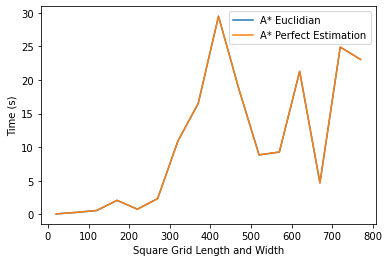

In [168]:
plt.plot(x, y)
plt.xlabel('Square Grid Length and Width')
plt.ylabel('Time in Seconds')
plt.legend(["A* Euclidian"])

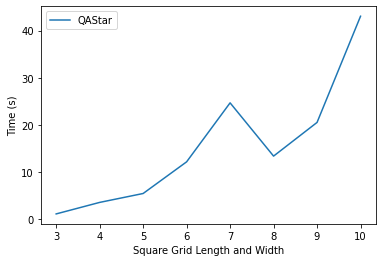

In [125]:
plt.plot(x_qi, y_qi)
plt.xlabel('Square Grid Length and Width')
plt.ylabel('Time (s)')
plt.legend(["QAStar"])

In [153]:
graph = Graph(length=18, width = 18, start_node=(0, 0), end_node=(17, 17)) # sn -> (j, i) en -> (j, i)

# grid = graph.get_grid()

# print(grid)

graph.wall_generation(generation_state='random', num_walls=5)
# graph.wall_generation(generation_state='custom', num_walls=5, coords=[[(10, 10), 10, 5]])

# grid = graph.get_grid()

# print(grid)

# path = graph.greedy_heuristic_alg(heuristic_type='euclidian')
# print(path)
graph.AStar(heuristic_type='euclidian')

18 7
18 0
18 4
18 1
18 2
(1, 0) (17, 17)
<class 'tuple'> <class 'tuple'>
(1, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(0, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(2, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(2, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(1, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(2, 0) (17, 17)
<class 'tuple'> <class 'tuple'>
(0, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(3, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(3, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(4, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(4, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(5, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(5, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(3, 0) (17, 17)
<class 'tuple'> <class 'tuple'>
(0, 3) (17, 17)
<class 'tuple'> <class 'tuple'>
(6, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(6, 1) (17, 17)
<class 'tuple'> <class 'tuple'>
(4, 0) (17, 17)
<class 'tuple'> <class 'tuple'>
(7, 2) (17, 17)
<class 'tuple'> <class 'tuple'>
(7, 1) (17, 17)

True

In [ ]:
# Python program to print all paths from a source to destination.
from collections import defaultdict
import time
import os
import random

# This class represents a directed graph
# using adjacency list representation
class Graph:
	def __init__(self, vertices):
		# No. of vertices
		self.V = vertices
		
		# default dictionary to store graph
		self.graph = defaultdict(list)

		self.paths = []
	
	def arr_to_graph_tuples(self, arr: list) -> list:
		surround_matrix = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, -1), (1, 1), (-1, -1), (-1, 1)]
		tups = []

		coords = []
		for i in range(len(arr)):
			for j in range(len(arr[i])):
				for change in surround_matrix:
					coords.append(((i, j), (i + change[0], j + change[1])))

		for coord in coords:
			if (coord[1][0] >= 0) and (coord[1][1] >= 0):
				if (coord[1][0] < len(arr)) and (coord[1][1] < len(arr[0])):
					tups.append((arr[coord[0][0]][coord[0][1]], arr[coord[1][0]][coord[1][1]]))
		
		return tups

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	'''A recursive function to print all paths from 'u' to 'd'.
	visited[] keeps track of vertices in current path.
	path[] stores actual vertices and path_index is current
	index in path[]'''
	def printAllPathsUtil(self, u, d, visited, path):

		# Mark the current node as visited and store in path
		visited[u]= True
		path.append(u)

		# If current vertex is same as destination, then print
		# current path[]
		if u == d:
			temp = [str(p) for p in path]
			temp = '-'.join(temp)

			self.paths.append(temp)
		else:
			# If current vertex is not destination
			# Recur for all the vertices adjacent to this vertex
			for i in self.graph[u]:
				if visited[i]== False:
					self.printAllPathsUtil(i, d, visited, path)
					
		# Remove current vertex from path[] and mark it as unvisited
		path.pop()
		visited[u]= False


	# Prints all paths from 's' to 'd'
	def printAllPaths(self, s, d):

		# Mark all the vertices as not visited
		visited =[False]*(self.V)

		# Create an array to store paths
		path = []

		# Call the recursive helper function to print all paths
		self.printAllPathsUtil(s, d, visited, path)


if __name__ == '__main__':
	# Create a graph given in the above diagram
	'''
	g = Graph(4)
	g.addEdge(0, 1)
	g.addEdge(0, 2)
	g.addEdge(0, 3)
	g.addEdge(2, 0)
	g.addEdge(2, 1)
	g.addEdge(1, 3)
	'''

	graph = [
		[1, 2, 4, 7, 11],
		[3, 5, 8, 12, 15],
		[6, 9, 13, 16, 18],
		[10, 14, 17, 19, 20]
	]
	g = Graph(len(graph) * len(graph[0]))

	tups = g.arr_to_graph_tuples(graph)

	for tup in tups:
		if random.randint(0, 100) > 25:
			g.addEdge(tup[0]-1, tup[1]-1)
		if random.randint(0, 100) > 25:
			g.addEdge(tup[1]-1, tup[0]-1)

	graph_hash = {i: None for i in range(len(graph)*len(graph[0]))}
	for key, val in g.graph.items():
		graph_hash[key] = list(set(val))
	g.graph = graph_hash

	print(g.graph)
	print()

	for i in range(0, 19):
		start = time.time()
		g.printAllPaths(i, 19)
		print(f"[ DFS Const. {i} -> 19 took {round((time.time() - start), 2)}s]")

	with open('./paths_found2.txt', 'w') as f:
		f.write(str(g.paths))


	'''
	with open('./paths_found.txt', 'w') as f:
		f.write(str(g.paths))
	'''	

	'''
	s = 2 ; d = 3
	print ("Following are all different paths from % d to % d :" %(s, d))
	g.printAllPaths(s, d)
	'''

{0: [1, 2, 4], 1: [0, 2, 3, 4], 2: [0, 1, 5, 8], 3: [1, 4, 6, 7, 11], 4: [0, 1, 2, 3, 5, 7, 12], 5: [2, 4, 8, 9, 13], 6: [10, 3, 14, 7], 7: [1, 3, 4, 6, 8, 11, 12, 15], 8: [2, 4, 5, 7, 9, 12, 13], 9: [8, 13, 5], 10: [11, 6, 14], 11: [3, 6, 7, 10, 14, 15, 17], 12: [4, 7, 8, 11, 15, 16, 18], 13: [5, 8, 9, 12, 16], 14: [17, 10, 6, 15], 15: [11, 12, 14, 16, 17, 19], 16: [8, 12, 13, 15, 18], 17: [18, 11, 14, 15], 18: [12, 15, 16, 17, 19], 19: [17, 18, 15]}

[ DFS Const. 0 -> 19 took 7.79s]
[ DFS Const. 1 -> 19 took 5.51s]
[ DFS Const. 2 -> 19 took 4.86s]
[ DFS Const. 3 -> 19 took 5.84s]
[ DFS Const. 4 -> 19 took 4.6s]
[ DFS Const. 5 -> 19 took 5.9s]
